In [760]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [761]:
df = pd.read_csv('data/tv_shows.csv')
platform_names = ['Netflix', 'Disney+', 'Prime Video', 'Hulu']
platform_colors = ['#E50914', '#0063B1', '#00A8E1', '#1CE783']
platform_counts = [df[platform].sum() for platform in platform_names]

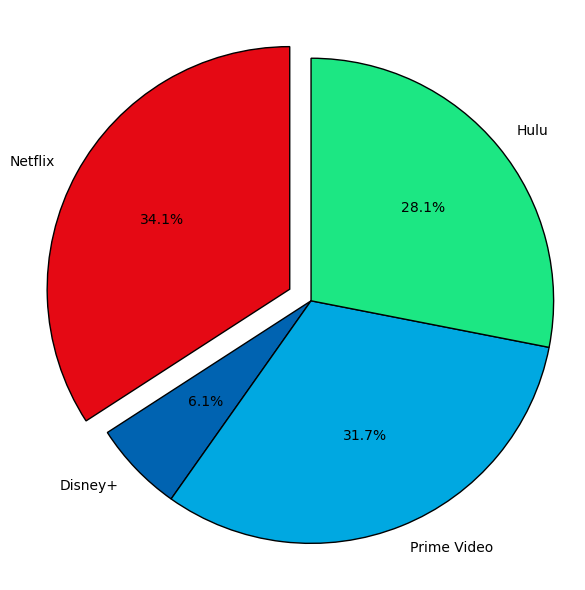

In [762]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(platform_counts, explode=(0.1, 0, 0, 0), labels=platform_names, autopct='%1.1f%%', startangle=90, colors=platform_colors, wedgeprops={'edgecolor': 'black'})
ax.axis('equal')
plt.tight_layout()
plt.show()

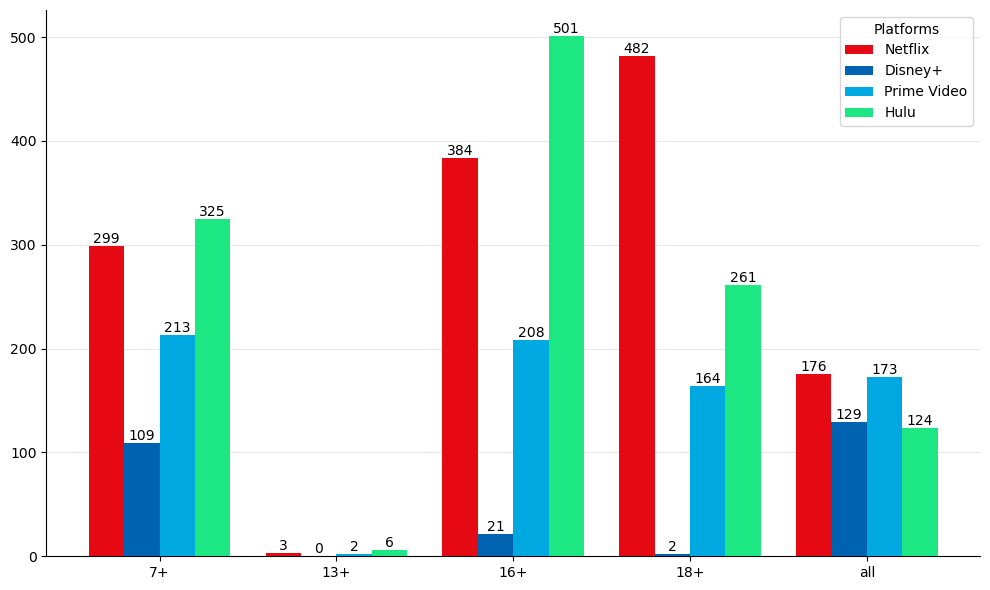

In [763]:
def sort_age(age):
    if age == '7+':
        return 7
    if age == '13+':
        return 13
    if age == '16+':
        return 16
    if age == '18+':
        return 18
    return 9999

means = {}
for platform in platform_names:
    platform_data = df[df[platform] == 1]
    means[platform] = platform_data['Age'].value_counts()

categories = sorted(df['Age'].dropna().unique(), key=sort_age)
bar_data = pd.DataFrame(0, index=categories, columns=platform_names)
for platform in platform_names:
    for age in categories:
        bar_data.loc[age, platform] = means.get(platform, {}).get(age, 0)

x = np.arange(len(categories))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True, axis='y', linestyle='-', alpha=0.3, zorder=0)

bars = []
for i, platform in enumerate(platform_names):
    bars.append(
        ax.bar(
            x + i * bar_width,
            bar_data[platform],
            bar_width,
            label=platform,
            color=platform_colors[i],
            zorder=3
        )
    )

for bar in bars:
    ax.bar_label(bar, label_type='edge', zorder=4)

ax.set_xticks(x + bar_width * (len(platform_names) - 1) / 2)
ax.set_xticklabels(categories)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title='Platforms', loc='upper right')
plt.tight_layout()
plt.show()

/var/folders/3n/vf15kv6n675_m6mzk8p8rfxr0000gn/T/ipykernel_230/3614230238.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3n/vf15kv6n675_m6mzk8p8rfxr0000gn/T/ipykernel_230/3614230238.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



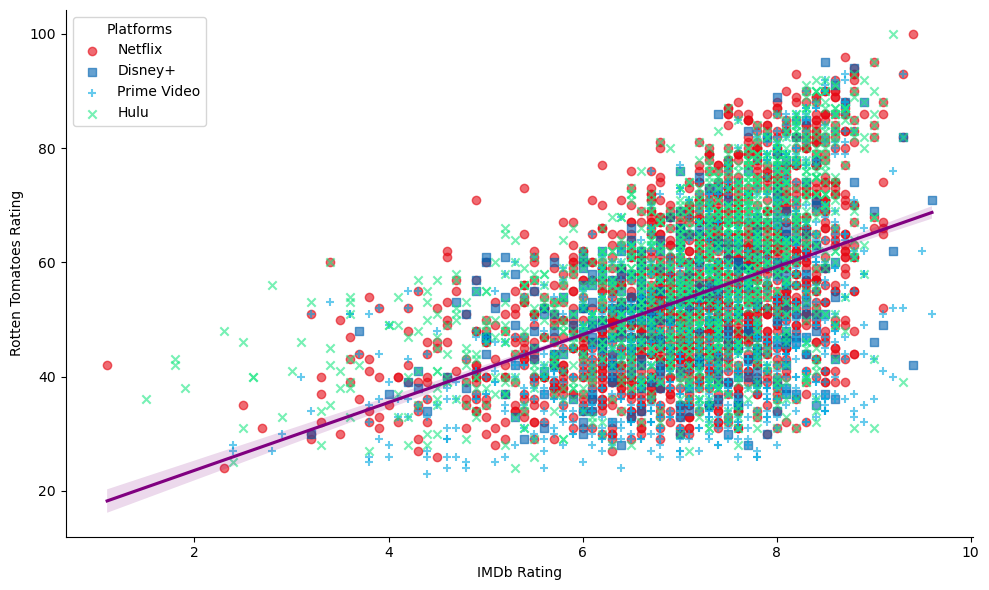

In [764]:
fig, ax = plt.subplots(figsize=(10, 6))
filtered_df = df.dropna(subset=['IMDb', 'Rotten Tomatoes'])
filtered_df['IMDb'] = filtered_df['IMDb'].str.replace('/10', '').astype(float)
filtered_df['Rotten Tomatoes'] = filtered_df['Rotten Tomatoes'].str.replace('/100', '').astype(float)

for platform, color, marker in zip(platform_names, platform_colors, ['o', 's', '+', 'x']):
    platform_data = filtered_df[filtered_df[platform] == 1]
    ax.scatter(platform_data['IMDb'], platform_data['Rotten Tomatoes'], label=platform, color=color, alpha=0.6, marker=marker)

sns.regplot(x='IMDb', y='Rotten Tomatoes', data=filtered_df, scatter=False, ax=ax, color='purple', line_kws={'label': 'Regression Line'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('IMDb Rating')
plt.ylabel('Rotten Tomatoes Rating')
plt.legend(title='Platforms', loc='upper left')
plt.tight_layout()
plt.show()

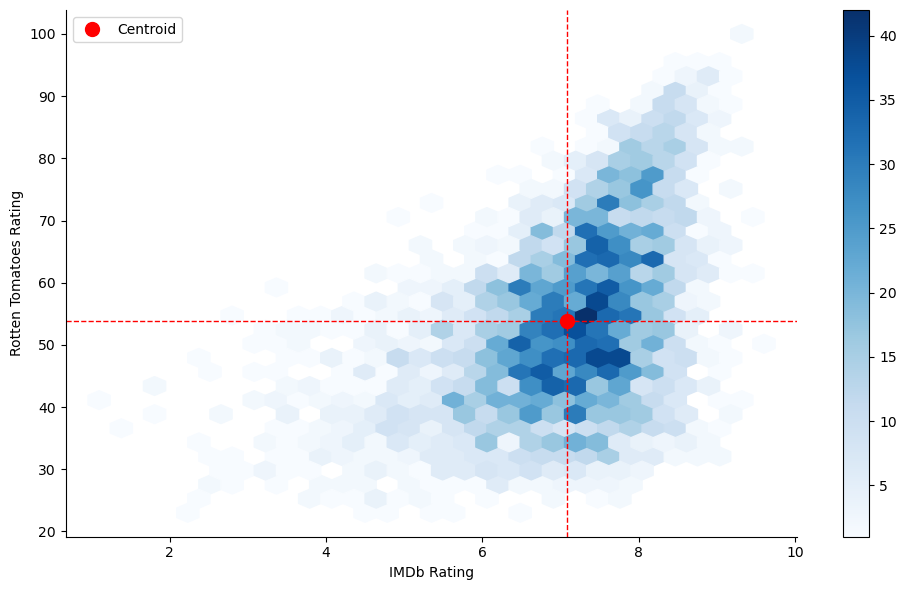

In [765]:
fig, ax = plt.subplots(figsize=(10, 6))
hb = ax.hexbin(filtered_df['IMDb'], filtered_df['Rotten Tomatoes'], gridsize=30, cmap='Blues', mincnt=1)
cb = fig.colorbar(hb, ax=ax)
centroid_x = filtered_df['IMDb'].mean()
centroid_y = filtered_df['Rotten Tomatoes'].mean()
ax.plot(centroid_x, centroid_y, "ro", markersize=10, label = "Centroid")
ax.axhline(y=centroid_y, color='r', linestyle='--', linewidth=1)
ax.axvline(x=centroid_x, color='r', linestyle='--', linewidth=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('IMDb Rating')
plt.ylabel('Rotten Tomatoes Rating')
plt.legend()
plt.tight_layout()
plt.show()

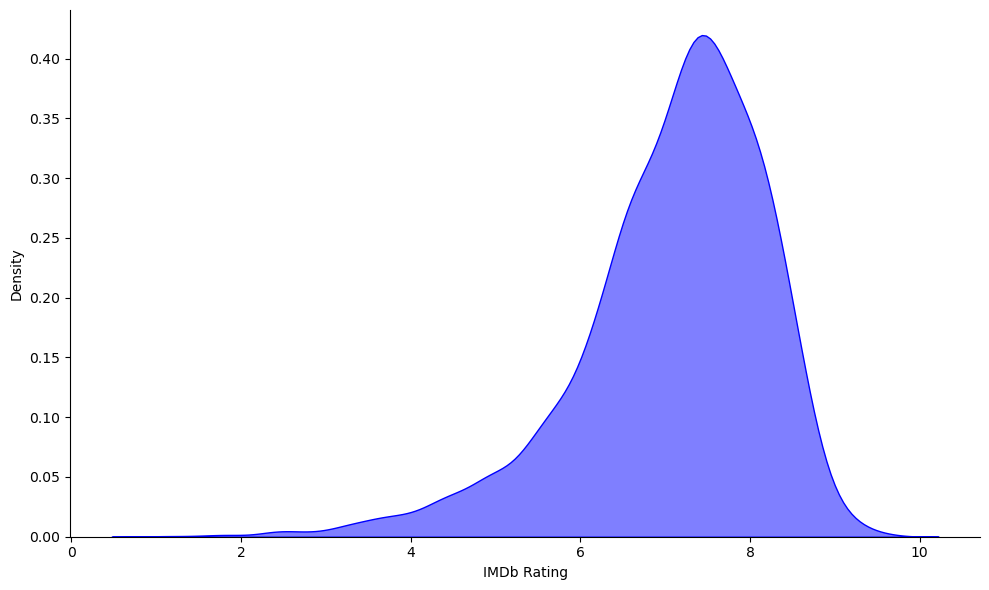

In [766]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x='IMDb', ax=ax, fill=True, color='blue', alpha=0.5)
ax.set_xlabel('IMDb Rating')
ax.set_ylabel('Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()